### Curse of dimensionality or manifold learning? 

Investigate the surprising effectiveness of KNN on MNIST datasets

In [85]:
import torch 
import numpy as np 
import sklearn
import torch.nn as nn 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [86]:
transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.1307,), (0.3081,))
])

# 2. Download and Load Training Data
train_set = datasets.MNIST(root='./data', train=True, download=False, transform=transform)

# 3. Download and Load Test Data
test_set = datasets.MNIST(root='./data', train=False, download=False, transform=transform)

In [87]:
def visualize (x, y, index): 
    # 1. Pick an index to visualize (e.g., the first image)
    flat_image = x[index]

    # 2. Reshape from (784,) back to (28, 28)
    reshaped_image = flat_image.reshape(28, 28)

    # 3. Plot it
    plt.figure(figsize=(4, 4))
    plt.imshow(reshaped_image, cmap='gray')
    plt.title(f"Label: {y[index]}")
    plt.axis('off') # Hide the X and Y pixel coordinates
    plt.show()

In [88]:
# convert to the tensors for processing, each image is flattened 
X_train = train_set.data.reshape(-1, 784).numpy()
y_train = train_set.targets.numpy()

X_test = test_set.data.reshape(-1, 784).numpy()
y_test = test_set.targets.numpy()

In [89]:
# KNN model 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)

# convert into searchable 
knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


### Performance Breakdown 
- the accuracy of KNN across small batch of test pictures or the entire set is very high (>97%)
- even with normalization and no PCA, KNN works suprisingly well 

- **normalization preserves distances** 

In [90]:
# very high accuracy from knn 
accuracy = knn.score(X_test[:50], y_test[:50])
print(f"KNN Accuracy: {accuracy * 100:.2f}%")

KNN Accuracy: 100.00%


#### Let's visualize some of the samples and predictions to see what the model is looking at 

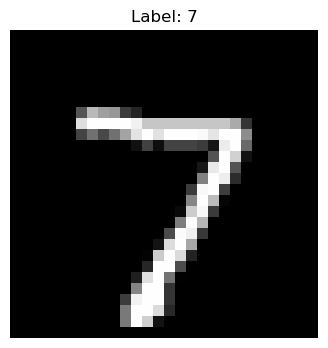

In [91]:
visualize(X_test, y_test, 0)

In [92]:
# visualize the predictions 
distances, indices = knn.kneighbors(X_test[:5], n_neighbors=3) 

- the distances are actually not the same acorss all the images, so this is either 
    - not enough dimensions/pixels in the images, so curse of dimensionality hasn't settled in yet  

In [ ]:
print("distances\n",distances)
print("indices\n", indices) # indices of the prediction from the training set 

distances
 [[ 676.58406721  793.98677571  862.67664858]
 [1162.9316403  1211.84446197 1285.92845835]
 [ 321.66286699  332.46353183  341.04838366]
 [1221.5825801  1228.23206276 1238.33880663]
 [1092.53466764 1096.04561949 1169.3438331 ]]
indices
 [[53843 38620 16186]
 [28882 49160 24612]
 [58741 46512 15224]
 [29044 59244 34523]
 [52920 40094 50609]]


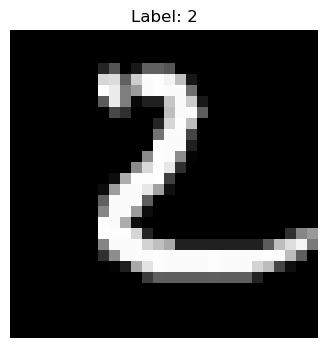

In [94]:
visualize(X_train,y_train, int(indices[1][1]))

#### Let's check the variance of the distances, to see if distance has indeed "collapsed" in the dimension 